In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from pandas.core.indexes.datetimes import DatetimeIndex
from scipy.stats import chi2_contingency
import matplotlib.ticker as mtick

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv',low_memory=False)

In [3]:
df.shape

(466285, 75)

In [4]:
df.sample(random_state=1)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
421662,421662,13105863,15128065,16000,16000,16000.0,36 months,12.49,535.19,B,B4,Director of Marketing,2 years,RENT,75000.0,Source Verified,Mar-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,972xx,OR,8.58,2.0,Apr-05,1.0,9.0,12.0,6.0,1.0,15252,67.2,11.0,f,7396.72,7396.72,11238.99,11238.99,8603.28,2635.71,0.0,0.0,0.0,Jan-16,535.19,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,21469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22700.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [7]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [8]:
#membuat dataframe baru dengan membuang kolom yang tidak relevan

df1 = df [['member_id','loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type','acc_now_delinq',
       'tot_cur_bal','total_rev_hi_lim']].copy()

In [9]:
df1.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
0,1296599,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN


In [10]:
df1.dtypes.value_counts()

float64    27
object     22
int64       5
dtype: int64

In [11]:
df1.shape

(466285, 54)

**Memisahkan kolom Categorical dan Numerical**

In [12]:
cats = ['term','grade','sub_grade','emp_title','emp_length',
       'home_ownership','verification_status','issue_d','loan_status',
       'pymnt_plan','purpose','title','addr_state','earliest_cr_line',
       'initial_list_status','application_type','policy_code']

In [13]:
df1[cats].describe(include='all')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,initial_list_status,application_type,policy_code
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,466265,466285,466256,466285,466285,466285.0
unique,2,7,35,205475,11,6,3,91,9,2,14,63099,50,664,2,1,NaN
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,CA,Oct-00,f,INDIVIDUAL,NaN
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,274195,164075,71450,3674,303005,466285,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
for col in cats:
  print(f'''value count kolom {col} :''')
  print(df1[col].value_counts())
  print()

value count kolom term :
 36 months    337953
 60 months    128332
Name: term, dtype: int64

value count kolom grade :
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

value count kolom sub_grade :
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

value count kolom emp_title :
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eas

In [15]:
df1['term_months'] = df1['term'].replace({'36 months':'36',
                                          '60 months':'60'}, inplace=True)
df1['term_months'].unique()

array([None], dtype=object)

In [16]:
term_num = ['term_months']

df1[term_num] = df1[term_num].apply(pd.to_numeric, errors='coerce', axis=1)
print(df1['term_months'].dtypes)

float64


In [17]:
df1['loan_status'] = df1['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'],['Fully Paid','Charged Off'])

In [18]:
df1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [19]:
bad_status = [
    'Charged Off',
    'Default',
    'Late (31-120 days)'
]
df1['loan_status'] = np.where(df1['loan_status'].isin(bad_status), 1, 0)

**Corelation**

In [20]:
# Corelation Numerical 

corr = df1.corr(method = 'spearman')
new_corr =corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [21]:
new_corr[new_corr.correlation >= 0.5]

,level_0,level_1,correlation
629,out_prncp_inv,out_prncp,0.999999
69,funded_amnt,loan_amnt,0.998809
104,funded_amnt_inv,funded_amnt,0.994772
699,total_pymnt_inv,total_pymnt,0.993899
103,funded_amnt_inv,loan_amnt,0.993207
874,collection_recovery_fee,recoveries,0.976526
138,installment,funded_amnt,0.966033
137,installment,loan_amnt,0.964087
139,installment,funded_amnt_inv,0.960155
733,total_rec_prncp,total_pymnt,0.946659


In [22]:
corr_with_target = df1.corrwith(df1.loan_status).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(36)
unique_values = df1.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')
corr_with_unique

,index,correlation_with_target,unique_values
0,loan_status,1.000000,2
1,recoveries,0.441171,22773
2,collection_recovery_fee,0.299227,20275
3,total_rec_late_fee,0.147750,5808
4,inq_last_6mths,0.073102,28
5,revol_util,0.050207,1269
6,dti,0.048102,3997
7,mths_since_last_record,0.022837,123
8,installment,0.013936,55622
9,loan_amnt,0.011819,1352


In [23]:
# Corelation Categorical

cat_features = ['term','grade','emp_title','home_ownership','verification_status','pymnt_plan',
                'purpose','title','addr_state','initial_list_status','application_type','emp_length']

error = 0.05

for column in cat_features:
    table = df1[[column, 'loan_status']].pivot_table(index='loan_status',
                                                   columns=column,
                                                   aggfunc=lambda x: len(x))
    _, p_value, _, _ = chi2_contingency(table)

    print('Variable:', column)
    print('p-value: ', p_value)
    if p_value < error:
        print('Variabel ' + column + ' dan loan_status saling berkorelasi')
    else:
        print('Variabel ' + column + ' dan loan_status tidak saling berkorelasi')
    print('')

Variable: term
p-value:  0.0
Variabel term dan loan_status saling berkorelasi

Variable: grade
p-value:  0.0
Variabel grade dan loan_status saling berkorelasi

Variable: emp_title
p-value:  nan
Variabel emp_title dan loan_status tidak saling berkorelasi

Variable: home_ownership
p-value:  nan
Variabel home_ownership dan loan_status tidak saling berkorelasi

Variable: verification_status
p-value:  1.1011712895478403e-208
Variabel verification_status dan loan_status saling berkorelasi

Variable: pymnt_plan
p-value:  0.007185645086446904
Variabel pymnt_plan dan loan_status saling berkorelasi

Variable: purpose
p-value:  0.0
Variabel purpose dan loan_status saling berkorelasi

Variable: title
p-value:  nan
Variabel title dan loan_status tidak saling berkorelasi

Variable: addr_state
p-value:  nan
Variabel addr_state dan loan_status tidak saling berkorelasi

Variable: initial_list_status
p-value:  7.216184133923969e-236
Variabel initial_list_status dan loan_status saling berkorelasi

Variab

**EDA Numerical**

In [24]:
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

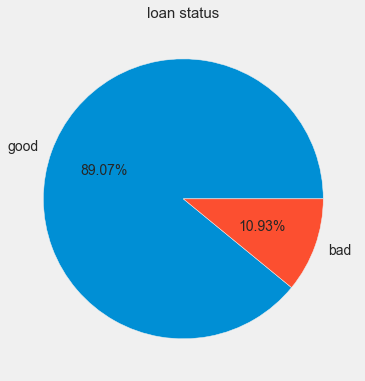

In [25]:
percentage = df1['loan_status'].value_counts()*100.0 /len(df1)
ax = percentage.plot.pie(autopct='%.2f%%', 
                        labels = ['good', 'bad'],
                        figsize =(8,6), 
                        fontsize = 14)                                                                           
ax.set_ylabel(None)
ax.set_title('loan status', fontsize = 15)
plt.show()

In [26]:
print(df1['loan_status'].value_counts())

0    415317
1     50968
Name: loan_status, dtype: int64


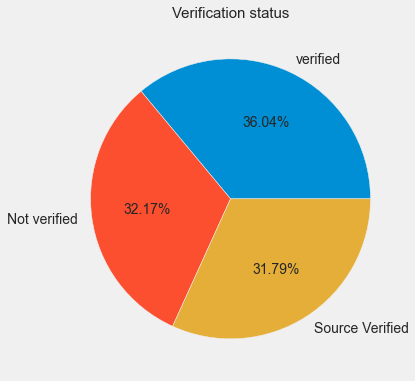

In [27]:
percentage = df1['verification_status'].value_counts()*100.0 /len(df1)
ax = percentage.plot.pie(autopct='%.2f%%', 
                        labels = ['verified', 'Not verified', 'Source Verified'],
                        figsize =(8,6), 
                        fontsize = 14)                                                                           
ax.set_ylabel(None)
ax.set_title('Verification status', fontsize = 15)
plt.show()

In [28]:
print(df1['verification_status'].value_counts())

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64


**EDA Categorical**

**Loan Rate By Term Type**

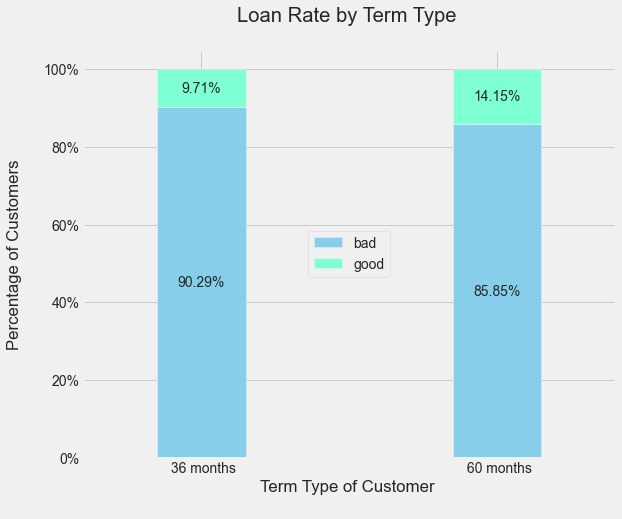

In [29]:
term_loan = df1.groupby(['term','loan_status']).size().unstack()
term_loan.rename(columns={1:'good', 0:'bad'}, inplace=True)

colors = ['Skyblue','Aquamarine']

ax = (term_loan.T*100.0 / term_loan.T.sum()).T.plot(kind='bar',
                                                      width = 0.3,
                                                      stacked = True,
                                                      rot = 0,
                                                      figsize = (8.5,7),
                                                      color = colors)

plt.ylabel('Percentage of Customers\n',
           horizontalalignment="center",
           fontstyle = "normal" 
           )

plt.xlabel('Term Type of Customer \n',
           horizontalalignment="center",
           fontstyle = "normal",)

plt.title('Loan Rate by Term Type \n',
          horizontalalignment="center",
          fontstyle = "normal"
          )

plt.legend(loc='center', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

**Loan Rate by Initial Type**

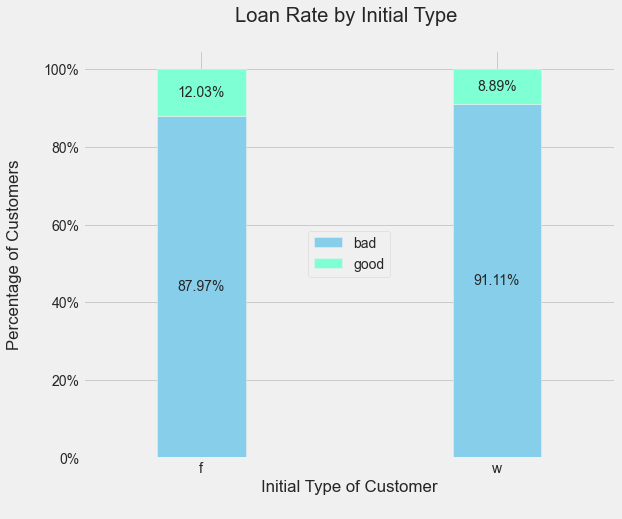

In [30]:
initial_loan = df1.groupby(['initial_list_status','loan_status']).size().unstack()
initial_loan.rename(columns={1:'good', 0:'bad'}, inplace=True)

colors = ['Skyblue','Aquamarine']

ax = (initial_loan.T*100.0 / initial_loan.T.sum()).T.plot(kind='bar',
                                                      width = 0.3,
                                                      stacked = True,
                                                      rot = 0,
                                                      figsize = (8.5,7),
                                                      color = colors)

plt.ylabel('Percentage of Customers\n',
           horizontalalignment="center",
           fontstyle = "normal" 
           )

plt.xlabel('Initial Type of Customer\n',
           horizontalalignment="center",
           fontstyle = "normal",)

plt.title('Loan Rate by Initial Type \n',
          horizontalalignment="center",
          fontstyle = "normal"
          )

plt.legend(loc='center', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

**Loan Rate By Grade Type**

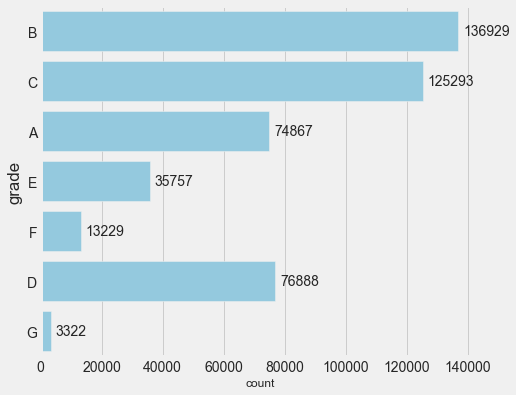

In [31]:
f, ax = plt.subplots(figsize=(7, 6))
sns.countplot(y="grade", data=df1, color='Skyblue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

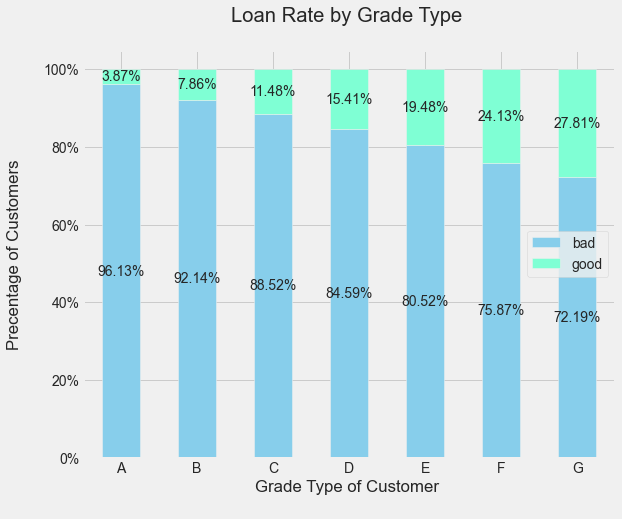

In [32]:
grade_loan = df1.groupby(['grade','loan_status']).size().unstack()
grade_loan.rename(columns={0:'bad', 1:'good'}, inplace=True)

colors = ['Skyblue','Aquamarine']

ax = (grade_loan.T*100.0 / grade_loan.T.sum()).T.plot(kind='bar',
                                                      width = 0.5,
                                                      stacked = True,
                                                      rot = 0,
                                                      figsize = (8.5,7),
                                                      color = colors
                                                      )

plt.ylabel('Precentage of Customers\n',
           horizontalalignment="center",
           fontstyle = "normal" 
           )

plt.xlabel('Grade Type of Customer \n',
           horizontalalignment="center",
           fontstyle = "normal")

plt.title('Loan Rate by Grade Type \n',
          horizontalalignment="center",
          fontstyle = "normal")

plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [33]:
#mengganti status cource verified ke verified
df1['verification_status']=df1['verification_status'].replace({'Source Verified':'Verified'})
df1['verification_status'].unique()

array(['Verified', 'Not Verified'], dtype=object)

**Loan Rate by Verification Type**

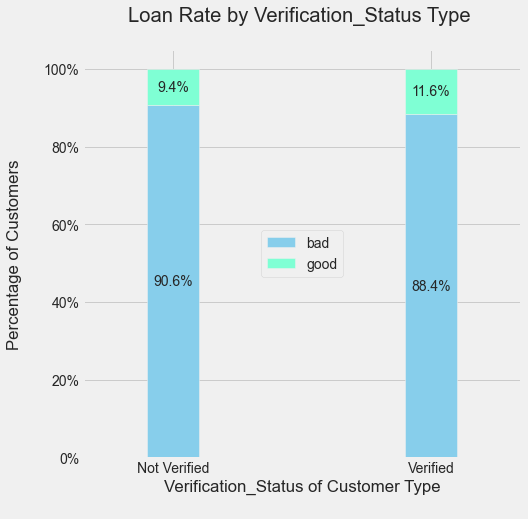

In [34]:
verif_loan = df1.groupby(['verification_status','loan_status']).size().unstack()
verif_loan.rename(columns={0:'bad', 1:'good'}, inplace=True)

colors = ['Skyblue','Aquamarine']

ax = (verif_loan.T*100.0 / verif_loan.T.sum()).T.plot(kind='bar',
                                                                    width = 0.2,
                                                                    stacked = True,
                                                                    rot = 0,
                                                                    figsize = (7,7),
                                                                    color = colors
                                                                    )

plt.ylabel('Percentage of Customers\n',
           horizontalalignment="center",
           fontstyle = "normal", 
           )

plt.xlabel('Verification_Status of Customer Type\n',
           horizontalalignment="center",
           fontstyle = "normal")

plt.title('Loan Rate by Verification_Status Type \n',
          horizontalalignment="center",
          fontstyle = "normal", 
          )

plt.legend(loc='center', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

**Loan Rate based Purpose Type**

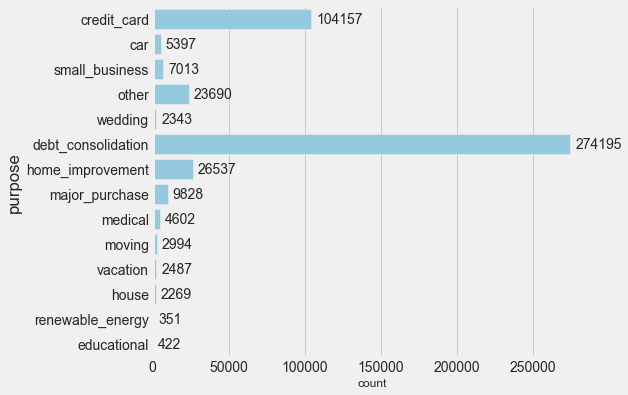

In [35]:
f, ax = plt.subplots(figsize=(7, 6))
sns.countplot(y="purpose", data=df1, color='SkyBlue')

for p in ax.patches:  
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

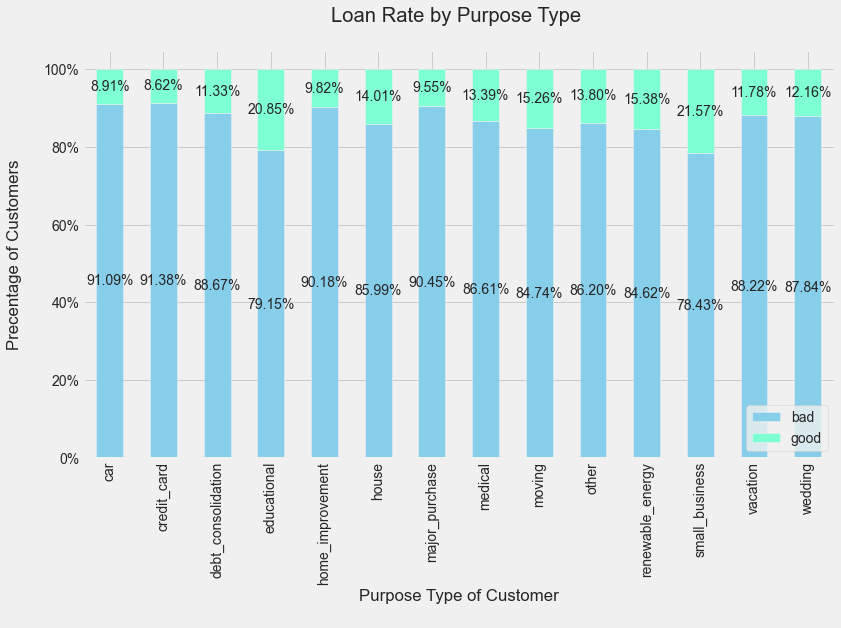

In [36]:
purpose_loan_type = df1.groupby(['purpose','loan_status']).size().unstack()
purpose_loan_type.rename(columns={0:'bad', 1:'good'}, inplace=True)

colors = ['SkyBlue','Aquamarine']

ax = (purpose_loan_type.T*100.0 / purpose_loan_type.T.sum()).T.plot(kind='bar',
                                                          width = 0.5,
                                                          stacked = True,
                                                          rot = 0,
                                                          figsize = (12,7),
                                                          color = colors
                                                          )

plt.ylabel('Precentage of Customers\n',
           horizontalalignment="center")

plt.xlabel('Purpose Type of Customer\n',
           horizontalalignment="center",
           fontstyle = "normal")

plt.title('Loan Rate by Purpose Type \n',
          horizontalalignment="center",
          fontstyle = "normal", 
          )

plt.legend(loc='lower right', fontsize = "medium")
plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
ax.autoscale(enable=False, axis='both', tight=False)

**Loan Rate by Issue Data and Last Payment Type**

In [37]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format='%b-%y')
df1['issue_year'] = DatetimeIndex(df1['issue_d']).year

In [38]:
df1['last_pymnt_date'] = pd.to_datetime(df1['last_pymnt_d'], format='%b-%y')
df1['last_pymnt_year'] = DatetimeIndex(df1['last_pymnt_date']).year

In [39]:
df1['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [40]:
df1['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

In [41]:
a={}
 
for i in df1.columns:
    a[i] = pd.concat([df1.groupby(i).loan_status.sum(),df1[i].value_counts(),round(df1.groupby(i).loan_status.sum()*100/df1[i].value_counts(),2)], axis=1)
    a[i].reset_index(level=0,inplace=True)
    a[i] = a[i].rename(columns = {'index':i, 'loan_status':'bad_loan', i:'Total_Customers', 0:'perc_of_total_cust'},)

In [42]:
def analysis_chart(variable):
  plt.figure(figsize=(30,20))
  fig, ax = plt.subplots()
  title1 = 'Customers Loan Status Analysed by ' + variable
  plt.title(title1, fontsize=15)

  line1 = ax.plot(a[variable][variable],a[variable]['bad_loan'], color='red', label = 'bad loan')
  line2 = ax.plot(a[variable][variable],a[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
 
  plt.xlabel (variable, fontsize=10) 

  for tick in ax.get_xticklabels():
    tick.set_rotation(90)

  ax2=ax.twinx()
 
  line3 = ax2.plot(a[variable][variable],a[variable]['perc_of_total_cust'], color='green', label = 'loan status as Percent of total')
  y = 0*a[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(a[variable][variable], y, color='SkyBlue', label='Average customer loan status', linestyle='dashed')

  plt.ylabel ('percentage of customers bad loan', fontsize=10)
  
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1), fontsize=10)

  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)
  plt.grid(None)

<Figure size 2160x1440 with 0 Axes>

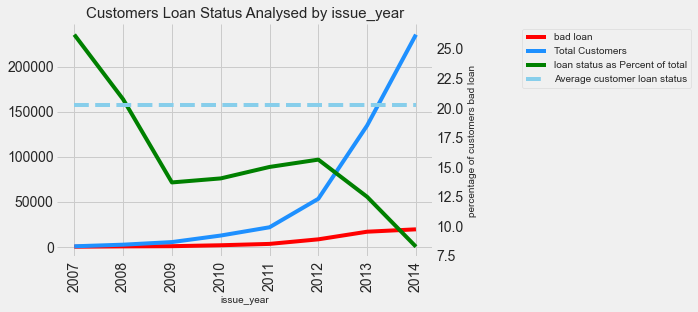

In [43]:
analysis_chart('issue_year')

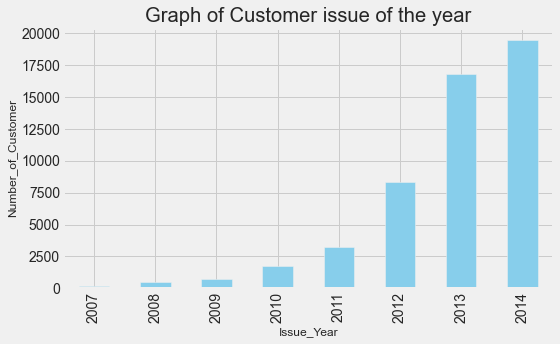

In [44]:
plt.figure(figsize=(8,5))
df_issue = df1.groupby(['issue_year'])['loan_status'].sum()
df_issue.plot(x='issue_year', y='loan_status', kind='bar', color='SkyBlue', title='Graph of Customer issue of the year')
plt.xlabel('Issue_Year', fontsize=12)
plt.ylabel('Number_of_Customer', fontsize=12)
plt.tight_layout()
plt.show()

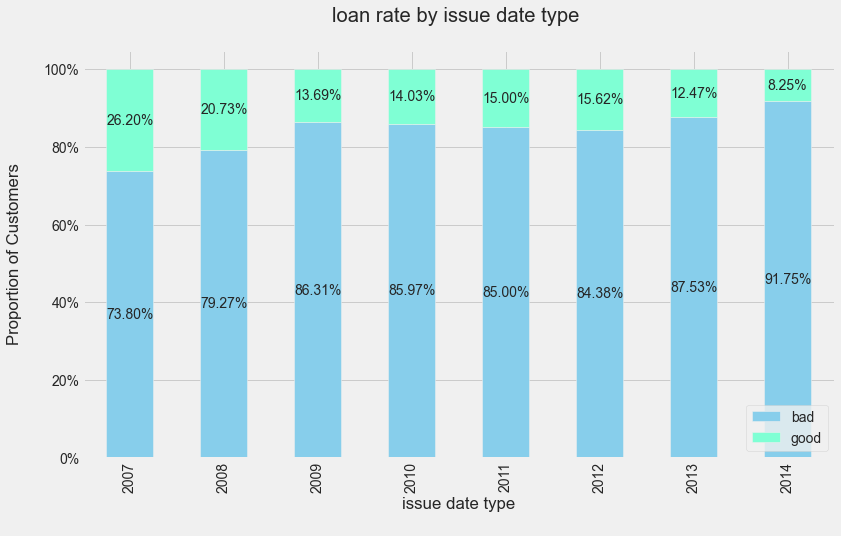

In [45]:
issue_loan = df1.groupby(['issue_year','loan_status']).size().unstack()
issue_loan.rename(columns={0:'bad', 1:'good'}, inplace=True)

colors = ['SkyBlue','Aquamarine']

ax = (issue_loan.T*100.0 / issue_loan.T.sum()).T.plot(kind='bar',
                                                          width = 0.5,
                                                          stacked = True,
                                                          rot = 0,
                                                          figsize = (12,7),
                                                          color = colors
                                                          )

plt.ylabel('Proportion of Customers\n',
           horizontalalignment="center")

plt.xlabel('issue date type\n',
           horizontalalignment="center",
           fontstyle = "normal")

plt.title('loan rate by issue date type \n',
          horizontalalignment="center",
          fontstyle = "normal", 
          )

plt.legend(loc='lower right', fontsize = "medium")
plt.xticks(rotation=90, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    
ax.autoscale(enable=False, axis='both', tight=False)

**Loan Rate by Last Payment**

<Figure size 2160x1440 with 0 Axes>

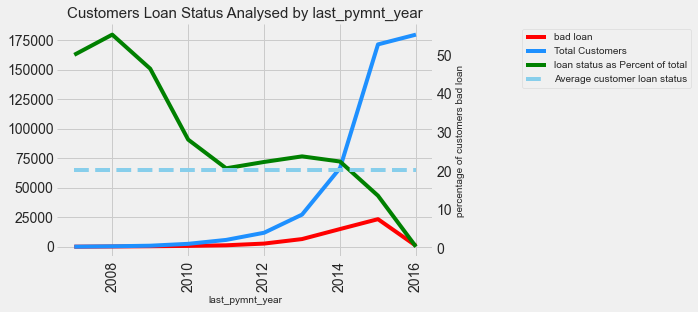

In [46]:
analysis_chart('last_pymnt_year')

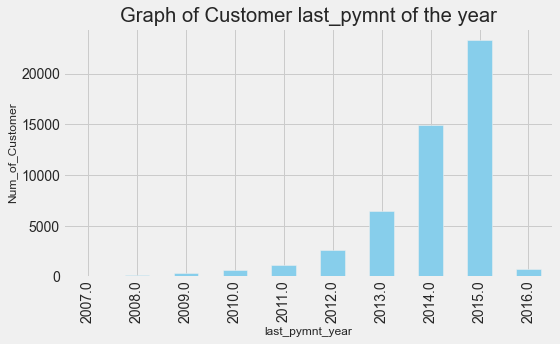

In [47]:
plt.figure(figsize=(8,5))
df_issue = df1.groupby(['last_pymnt_year'])['loan_status'].sum()
df_issue.plot(x='last_pymnt_year', y='loan_status', kind='bar',color='Skyblue', title='Graph of Customer last_pymnt of the year')
plt.xlabel('last_pymnt_year', fontsize=12)
plt.ylabel('Num_of_Customer', fontsize=12)
plt.tight_layout()
plt.show()

**EDA Numerical** 

C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  wa

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomne

<Figure size 432x288 with 0 Axes>

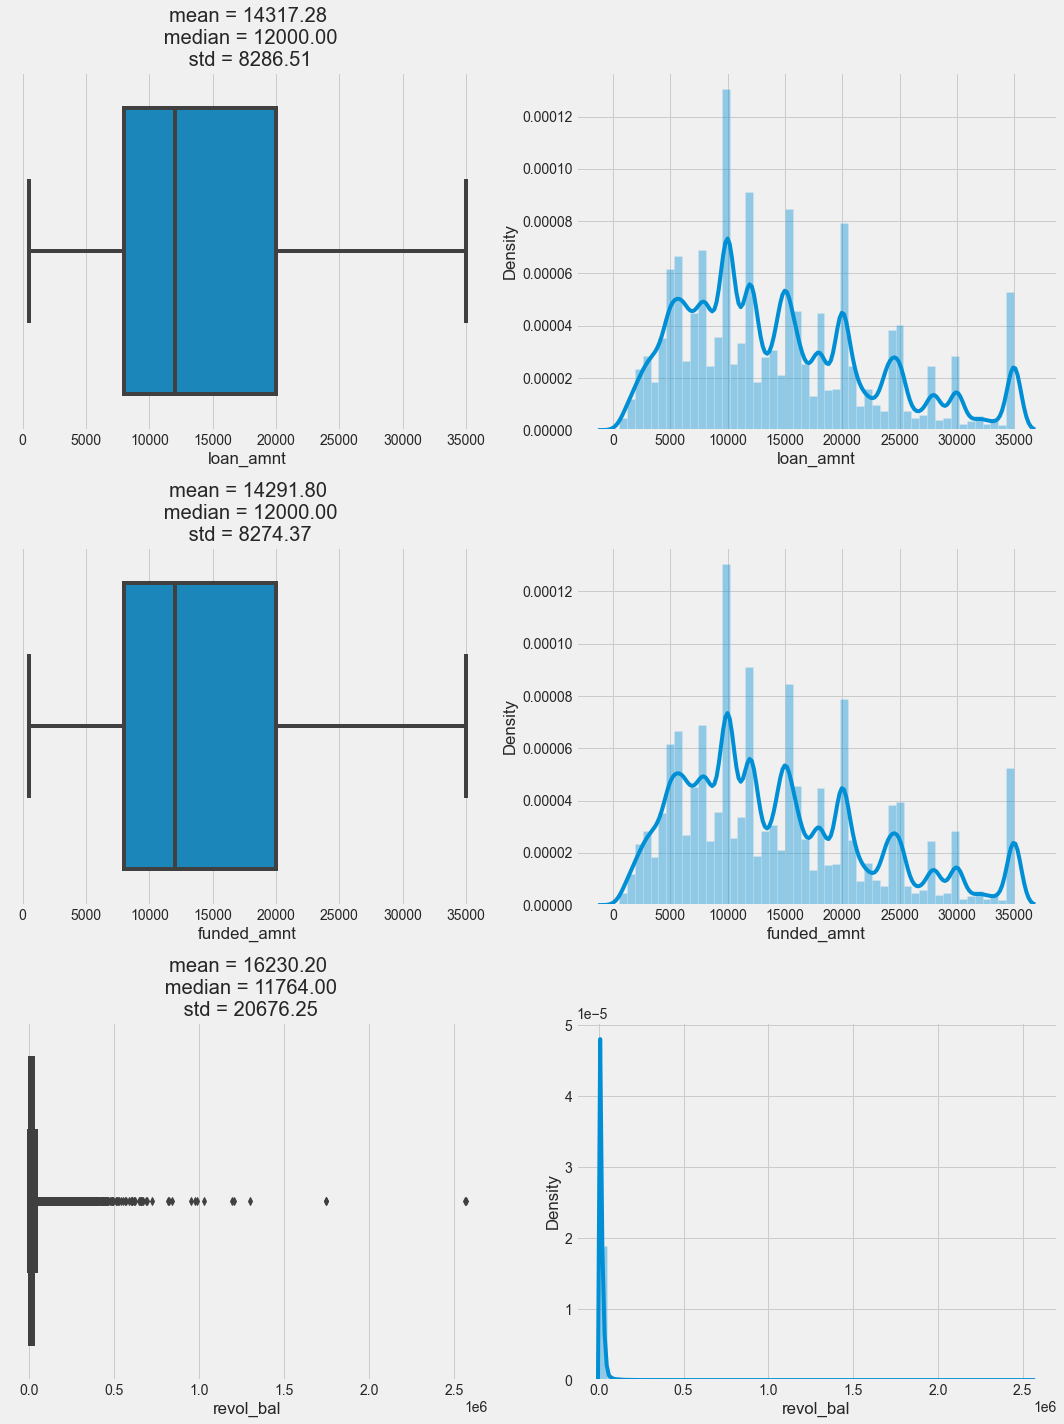

In [48]:
numerical_int = ['loan_amnt','funded_amnt','revol_bal']

plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    for i, kol in enumerate(features):
	    sns.boxplot(df1[kol], ax = axs[i][0])
	    sns.distplot(df1[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df1[kol].mean(), df1[kol].median(), df1[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(numerical_int)

C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  wa

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomne

<Figure size 432x288 with 0 Axes>

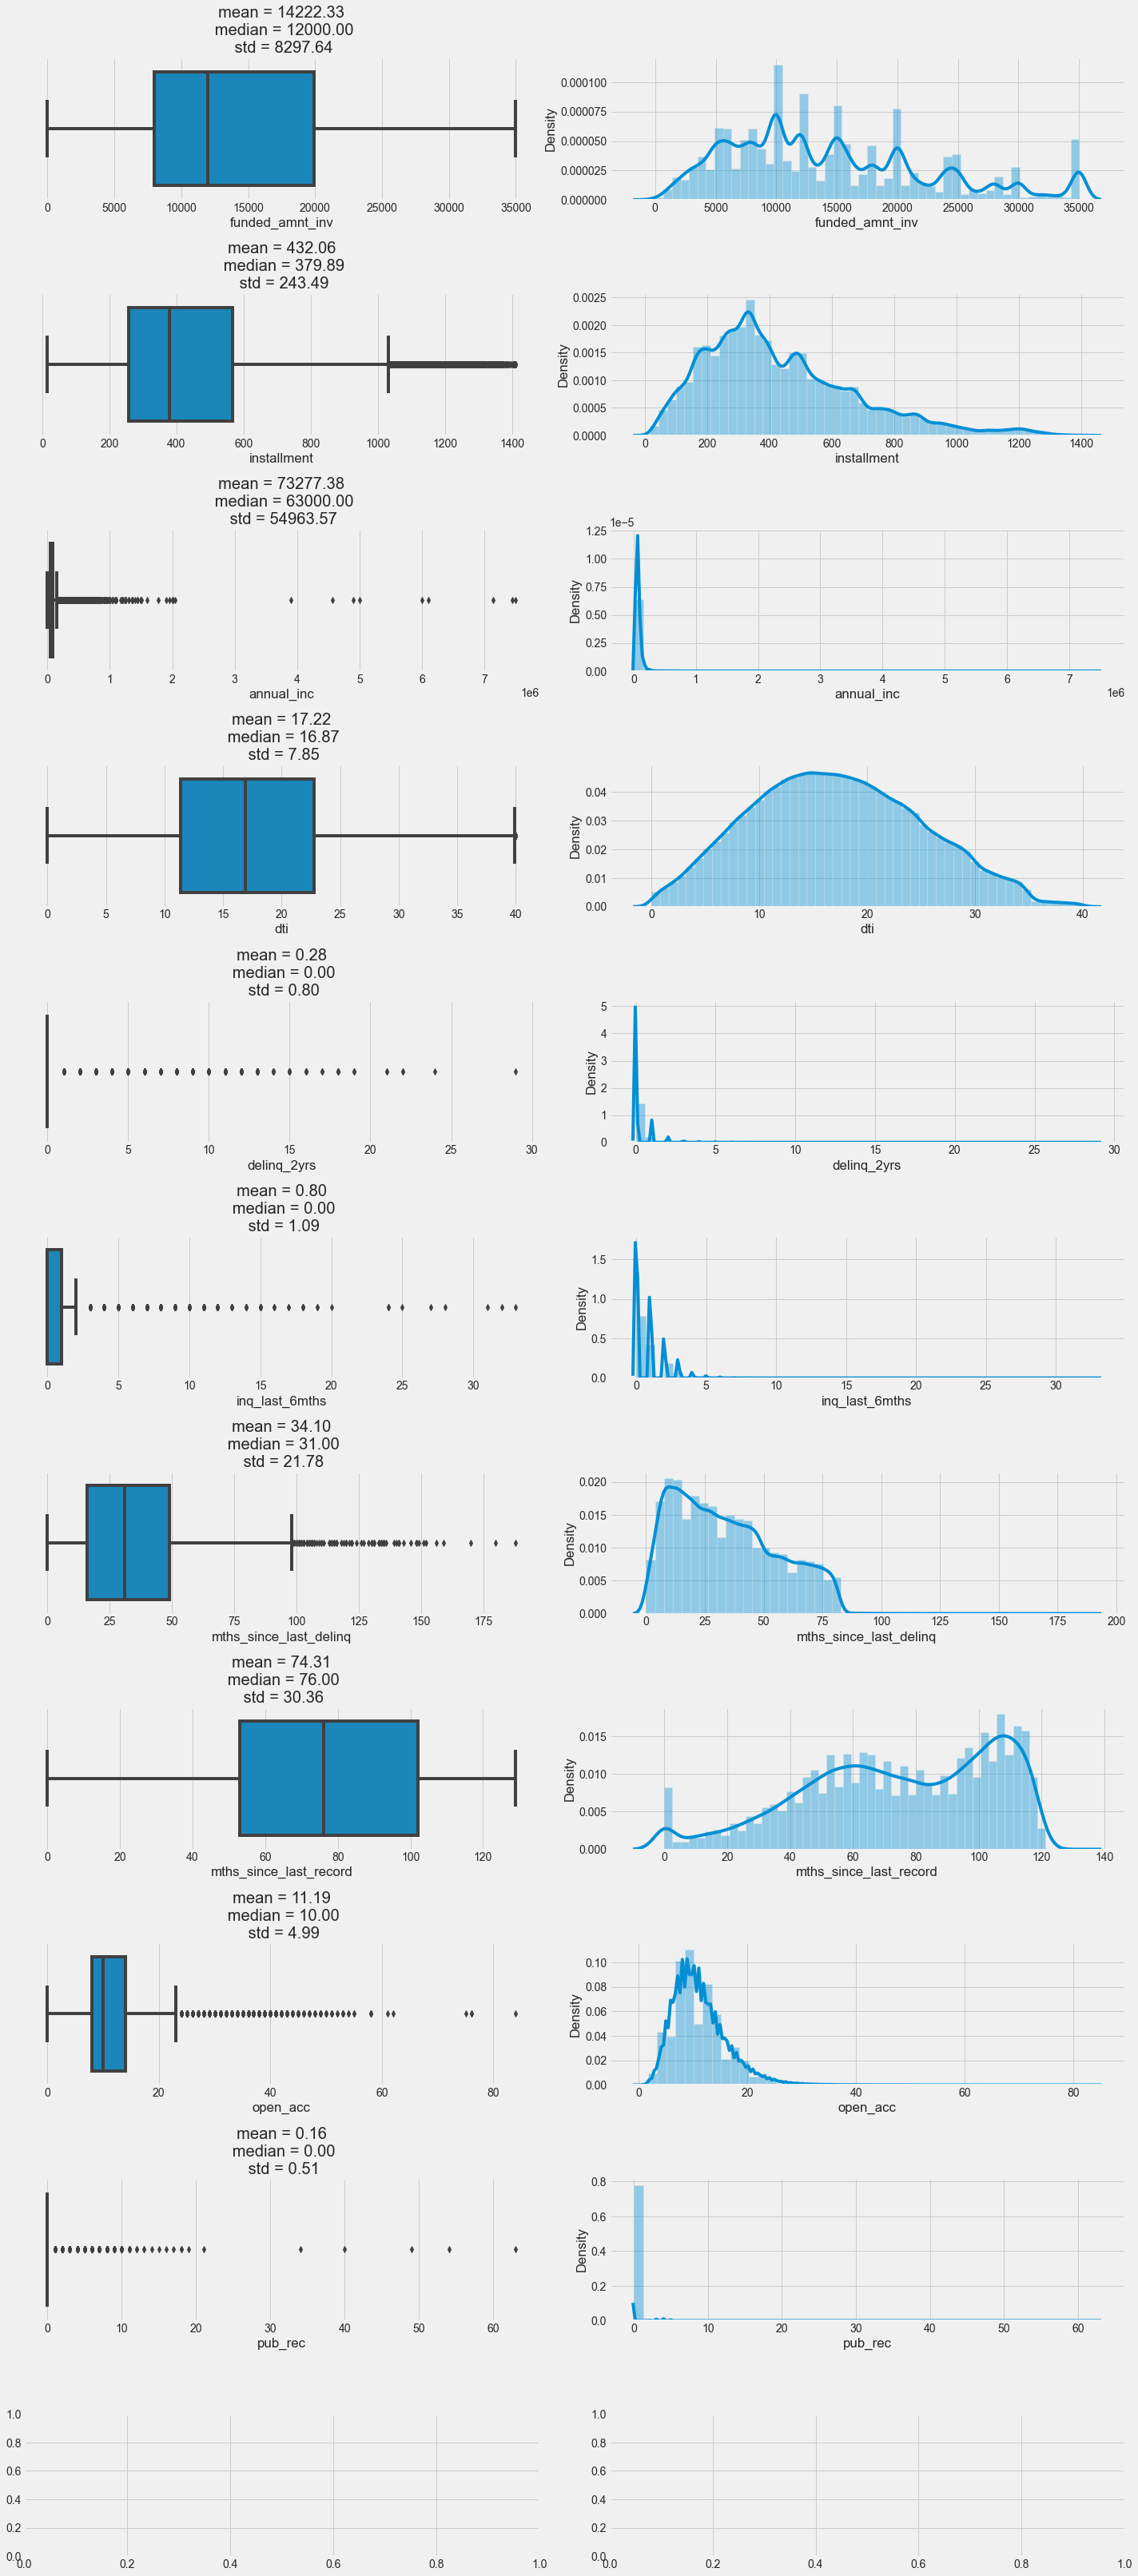

In [49]:
numerical_float = ['funded_amnt_inv','installment','annual_inc',
             'dti','delinq_2yrs','inq_last_6mths',
             'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec']


plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(11, 2, figsize=(20, 45))
    for i, kol in enumerate(features):
	    sns.boxplot(df1[kol], ax = axs[i][0])
	    sns.distplot(df1[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df1[kol].mean(), df1[kol].median(), df1[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(numerical_float)

C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pandiepie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  wa

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomne

<Figure size 432x288 with 0 Axes>

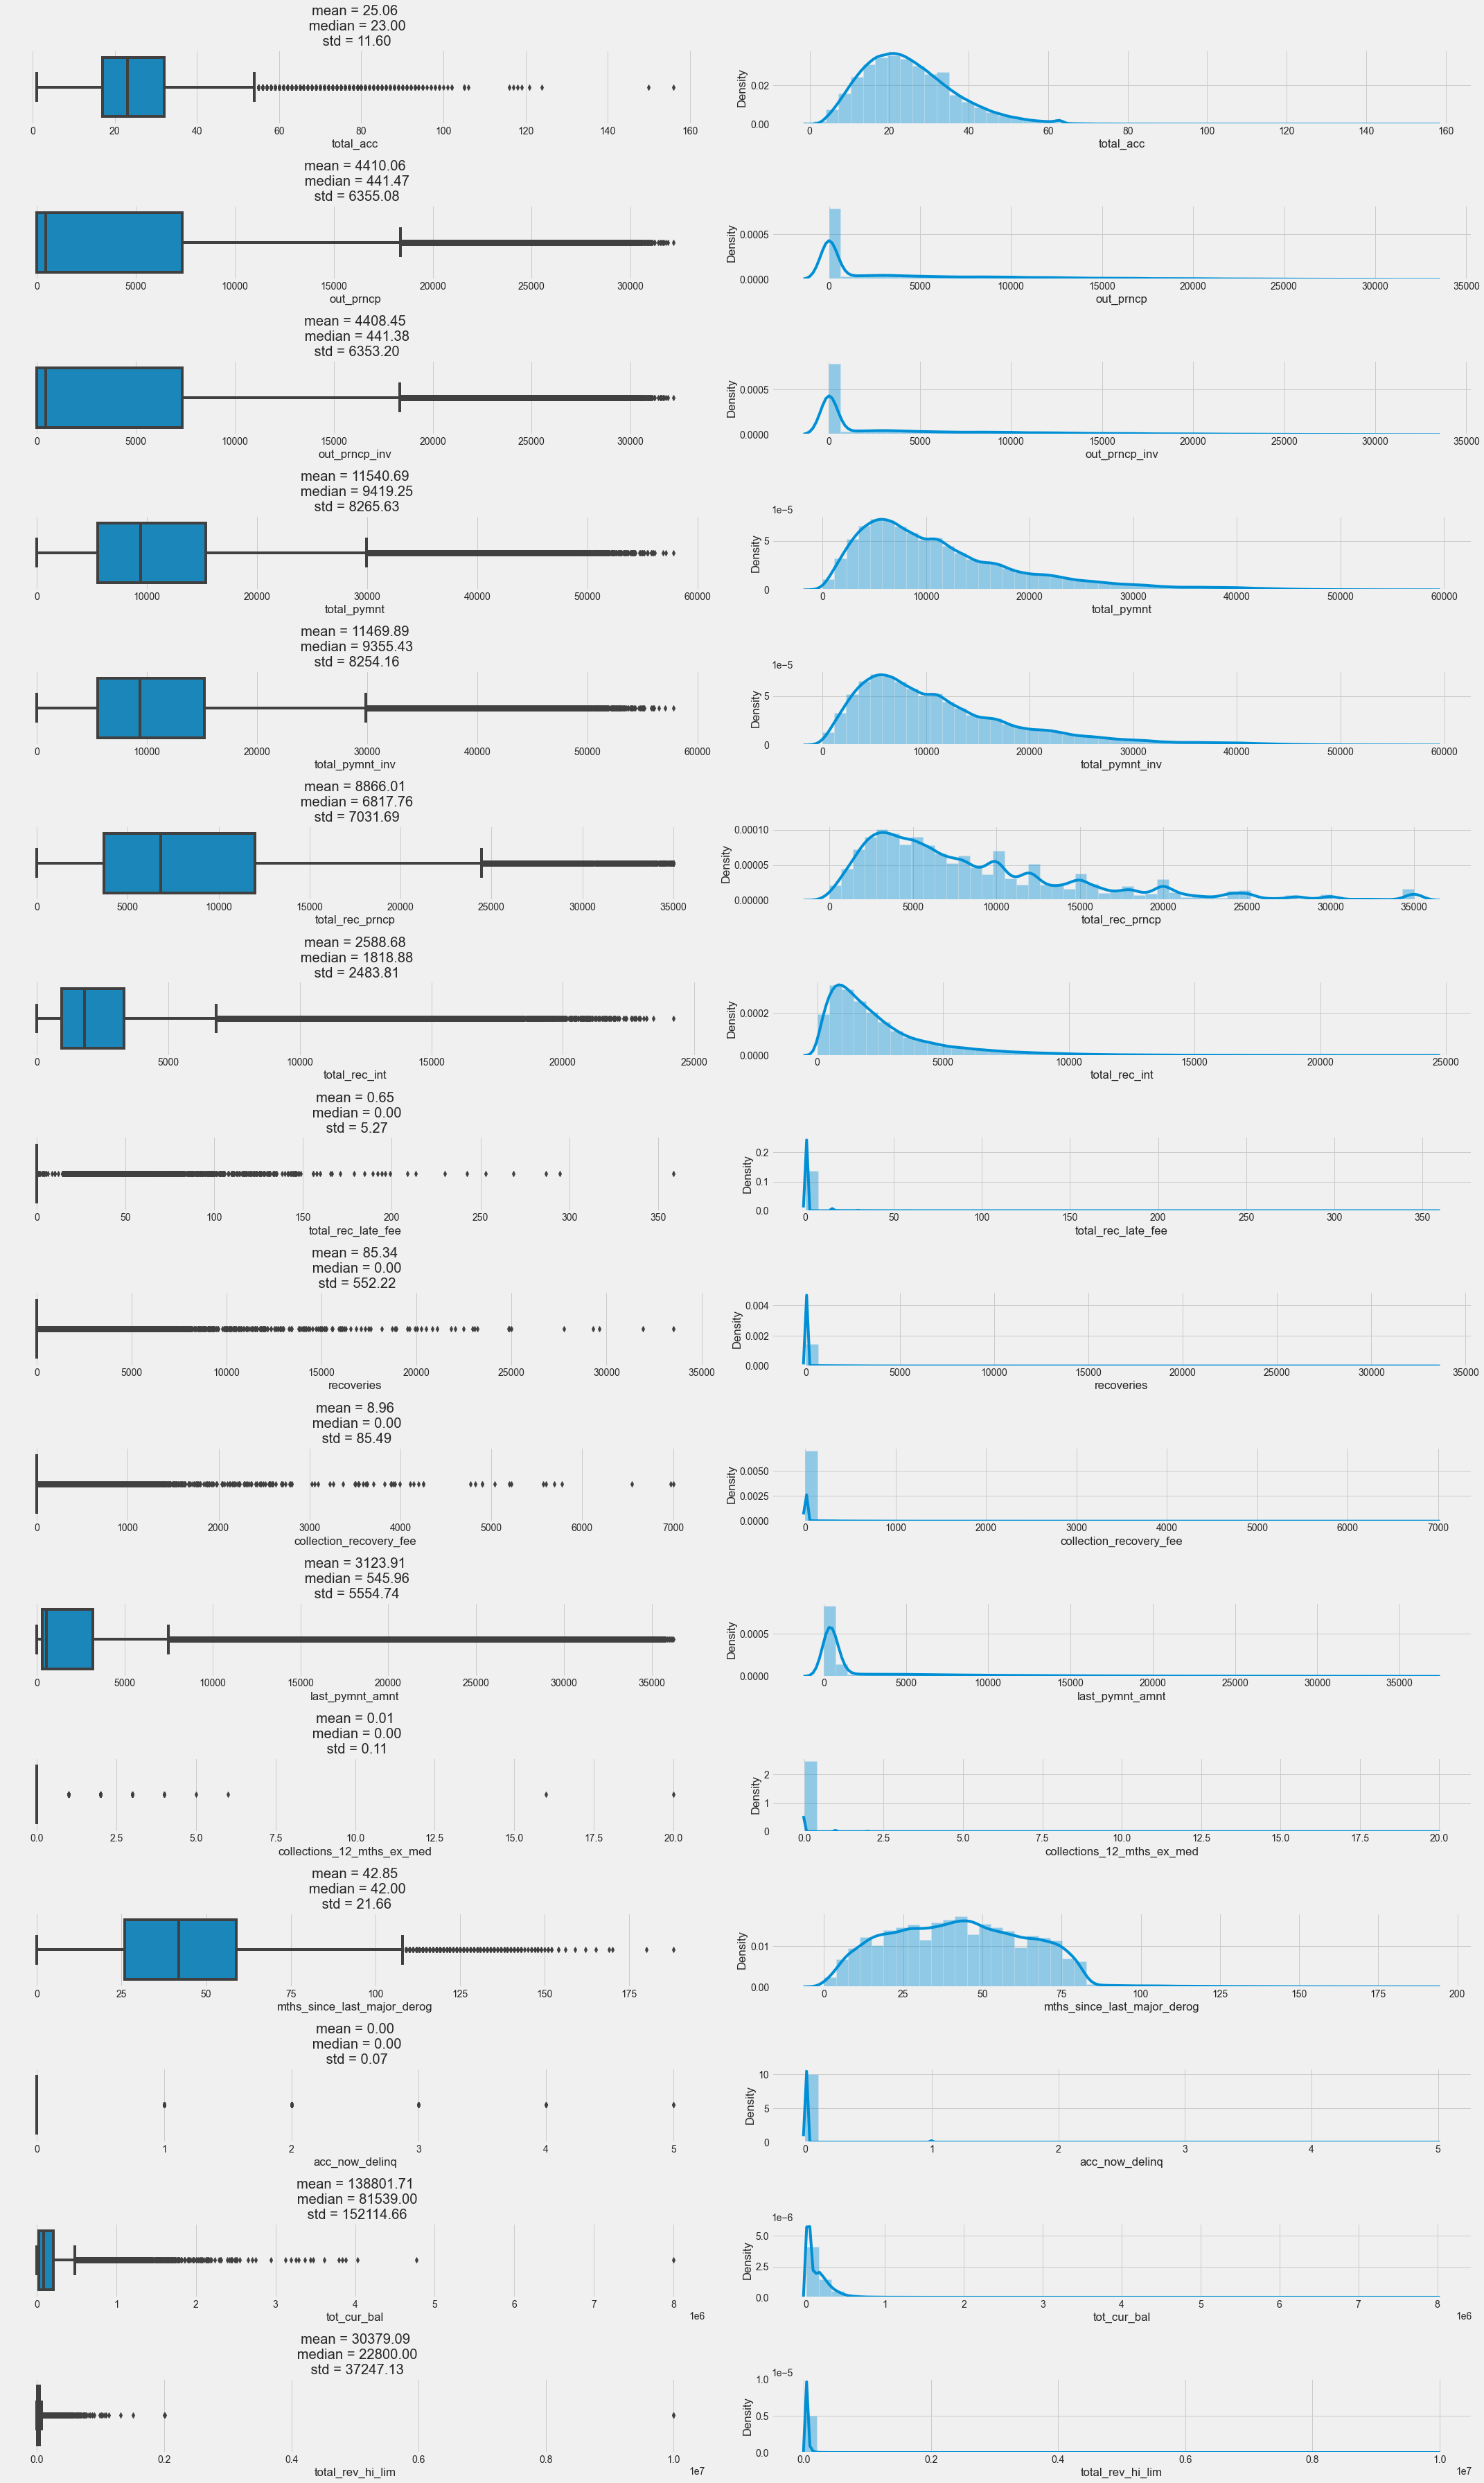

In [50]:
numerical_float2 = ['total_acc','out_prncp','out_prncp_inv','total_pymnt',
              'total_pymnt_inv','total_rec_prncp','total_rec_int',
              'total_rec_late_fee','recoveries','collection_recovery_fee',
              'last_pymnt_amnt','collections_12_mths_ex_med',
              'mths_since_last_major_derog','acc_now_delinq','tot_cur_bal',
              'total_rev_hi_lim']


plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(16, 2, figsize=(30, 50))
    for i, kol in enumerate(features):
	    sns.boxplot(df1[kol], ax = axs[i][0])
	    sns.distplot(df1[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df1[kol].mean(), df1[kol].median(), df1[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(numerical_float2)

Text(0, 0.5, 'loan_amnt')

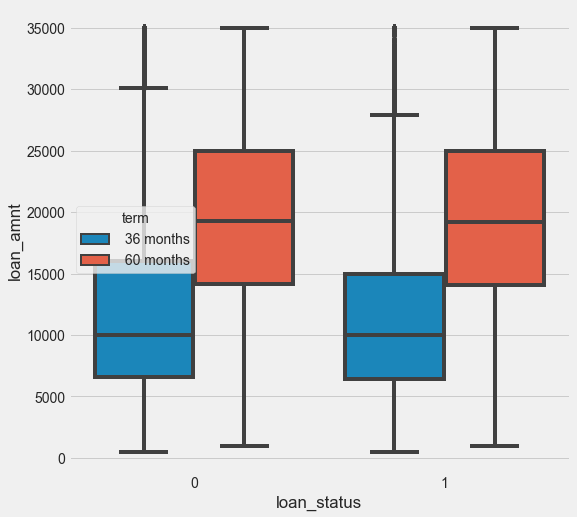

In [51]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='loan_status', y='loan_amnt', hue='term', data=df1)
plt.ylabel('loan_amnt')

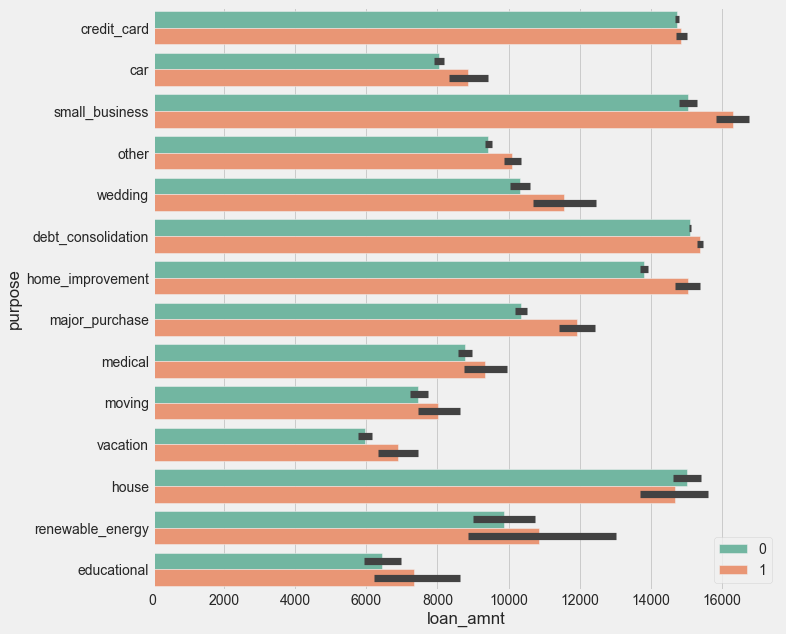

In [52]:
plt.figure(figsize=(10, 10))

ax = sns.barplot(x="loan_amnt",
              y="purpose",
              hue="loan_status", 
              data=df1,
              palette="Set2", 
              dodge=True,
              color=".8")

plt.legend(loc='lower right', fontsize = "medium")

**Preprocesing**

In [82]:
df = df[['loan_amnt','funded_amnt',
       'funded_amnt_inv','term','installment','grade',
       'emp_title','emp_length','home_ownership','annual_inc',
       'verification_status','issue_d','loan_status','pymnt_plan',
       'purpose','title','addr_state','dti','delinq_2yrs','earliest_cr_line',
       'inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
       'tot_cur_bal','total_rev_hi_lim','next_pymnt_d','mths_since_last_delinq',
       'initial_list_status','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
       'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
       'last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq']].copy()

In [83]:
df['term_months'] = df['term'].replace([' 36 months',' 60 months'],['36','60'])
term_num = ['term_months']

df[term_num] = df[term_num].apply(pd.to_numeric, errors='coerce', axis=1)
print(df['term_months'].dtypes)

int64


In [84]:
df['verification_status'].replace({'Source Verified':'Verified'})

0             Verified
1             Verified
2         Not Verified
3             Verified
4             Verified
              ...     
466280        Verified
466281        Verified
466282        Verified
466283        Verified
466284        Verified
Name: verification_status, Length: 466285, dtype: object

In [85]:
bad_status = [
    'Charged Off' 
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]
df['bad_flag'] = np.where(df['loan_status'].isin(bad_status), 1, 0)

In [86]:
df.drop('loan_status', axis=1, inplace=True)
df.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,next_pymnt_d,mths_since_last_delinq,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,term_months,bad_flag
0,5000,5000,4975.0,36 months,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,NaN,NaN,NaN,NaN,f,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,36,0


In [87]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')

C:\Users\PANDIE~1\AppData\Local\Temp/ipykernel_18064/1732335877.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')


In [88]:
df['emp_length_int'] = df['emp_length_int'].astype(float)

In [89]:
df.drop('emp_length', axis=1, inplace=True)

**earliest column**

In [91]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [93]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [94]:
df.loc[df['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df['mths_since_earliest_cr_line'].max()

In [95]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

**Issue_date columns**

In [97]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['issue_d_date']) / np.timedelta64(1, 'M')))

In [98]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

**last pymnt column**

In [99]:
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [100]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

**next paymnt columns**

In [101]:
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [102]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

**last_credit_pull_d columns**

In [103]:
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [104]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [105]:
corr_with_target = df.corrwith(df.bad_flag).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(36)
unique_values = df.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')
corr_with_unique

,index,correlation_with_target,unique_values
0,bad_flag,1.000000,2
1,recoveries,0.441171,22773
2,collection_recovery_fee,0.299227,20275
3,mths_since_last_pymnt_d,0.244581,98
4,mths_since_next_pymnt_d,0.154003,100
5,total_rec_late_fee,0.147750,5808
6,mths_since_last_credit_pull_d,0.136595,103
7,mths_since_issue_d,0.087575,91
8,inq_last_6mths,0.073102,28
9,term_months,0.063565,2


In [106]:
df = df.drop(['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d'], axis=1)

In [107]:
df.head()

,loan_amnt,term,grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,mths_since_last_delinq,initial_list_status,total_rec_late_fee,recoveries,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,term_months,bad_flag,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,36 months,B,NaN,RENT,24000.0,Verified,n,credit_card,Computer,AZ,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,NaN,NaN,f,0.00,0.00,0.0,1,INDIVIDUAL,0.0,36,0,10.0,395.0,72.0
1,2500,60 months,C,Ryder,RENT,30000.0,Source Verified,n,car,bike,GA,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,NaN,NaN,f,0.00,117.08,0.0,1,INDIVIDUAL,0.0,60,1,0.0,224.0,72.0
2,2400,36 months,C,NaN,RENT,12252.0,Not Verified,n,small_business,real estate business,IL,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,NaN,NaN,f,0.00,0.00,0.0,1,INDIVIDUAL,0.0,36,0,10.0,193.0,72.0
3,10000,36 months,C,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,n,other,personel,CA,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,NaN,35.0,f,16.97,0.00,0.0,1,INDIVIDUAL,0.0,36,0,10.0,262.0,72.0
4,3000,60 months,B,University Medical Group,RENT,80000.0,Source Verified,n,other,Personal,OR,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,NaN,38.0,f,0.00,0.00,0.0,1,INDIVIDUAL,0.0,60,0,1.0,263.0,72.0


In [108]:
from scipy.stats import chi2_contingency

In [110]:
cat_features = ['grade','emp_title','home_ownership','verification_status','pymnt_plan',
                'purpose','title','addr_state','initial_list_status','application_type']

error = 0.05

for column in cat_features:
    table = df[[column, 'bad_flag']].pivot_table(index='bad_flag',
                                                   columns=column,
                                                   aggfunc=lambda x: len(x))
    _, p_value, _, _ = chi2_contingency(table)

    print('Variable:', column)
    print('p-value: ', p_value)
    if p_value < error:
        print('Variabel ' + column + ' dan bad_flag saling berkorelasi')
    else:
        print('Variabel ' + column + ' dan bad_flag tidak saling berkorelasi')
    print('')

Variable: grade
p-value:  0.0
Variabel grade dan bad_flag saling berkorelasi

Variable: emp_title
p-value:  nan
Variabel emp_title dan bad_flag tidak saling berkorelasi

Variable: home_ownership
p-value:  nan
Variabel home_ownership dan bad_flag tidak saling berkorelasi

Variable: verification_status
p-value:  1.1011712895478403e-208
Variabel verification_status dan bad_flag saling berkorelasi

Variable: pymnt_plan
p-value:  0.007185645086446904
Variabel pymnt_plan dan bad_flag saling berkorelasi

Variable: purpose
p-value:  0.0
Variabel purpose dan bad_flag saling berkorelasi

Variable: title
p-value:  nan
Variabel title dan bad_flag tidak saling berkorelasi

Variable: addr_state
p-value:  nan
Variabel addr_state dan bad_flag tidak saling berkorelasi

Variable: initial_list_status
p-value:  7.216184133923969e-236
Variabel initial_list_status dan bad_flag saling berkorelasi

Variable: application_type
p-value:  1.0
Variabel application_type dan bad_flag tidak saling berkorelasi



In [111]:
df = df.drop(['application_type','addr_state','title','home_ownership','emp_title','term','policy_code','pymnt_plan'], axis=1)
df.head(2)

,loan_amnt,grade,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,mths_since_last_delinq,initial_list_status,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,term_months,bad_flag,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,B,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,NaN,NaN,f,0.0,0.00,0.0,0.0,36,0,10.0,395.0,72.0
1,2500,C,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,NaN,NaN,f,0.0,117.08,0.0,0.0,60,1,0.0,224.0,72.0


In [112]:
print('Status Missing Values :',df.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
mths_since_last_delinq         250351
tot_cur_bal                     70276
emp_length_int                  21008
revol_util                        340
collections_12_mths_ex_med        145
total_acc                          29
mths_since_earliest_cr_line        29
delinq_2yrs                        29
inq_last_6mths                     29
open_acc                           29
pub_rec                            29
acc_now_delinq                     29
annual_inc                          4
recoveries                          0
bad_flag                            0
term_months                         0
loan_amnt                           0
total_rec_late_fee                  0
initial_list_status                 0
grade                               0
revol_bal                           0
dti                                 0
purpose                             0
verification_status                 0
mths_si

In [113]:
df.columns

Index(['loan_amnt', 'grade', 'annual_inc', 'verification_status', 'purpose',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'tot_cur_bal',
       'mths_since_last_delinq', 'initial_list_status', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'term_months', 'bad_flag', 'emp_length_int',
       'mths_since_earliest_cr_line', 'mths_since_issue_d'],
      dtype='object')

In [115]:
num_features = ['loan_amnt','annual_inc','dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc','total_rec_late_fee', 'recoveries','collections_12_mths_ex_med', 
       'acc_now_delinq', 'tot_cur_bal','term_months', 'bad_flag', 'emp_length_int',
       'mths_since_earliest_cr_line', 'mths_since_issue_d',]


for col in num_features:
    if df[col].isnull().mean()>0:
        print(col, round(df[col].isnull().mean(),4))

annual_inc 0.0
delinq_2yrs 0.0001
inq_last_6mths 0.0001
open_acc 0.0001
pub_rec 0.0001
revol_util 0.0007
total_acc 0.0001
collections_12_mths_ex_med 0.0003
acc_now_delinq 0.0001
tot_cur_bal 0.1507
emp_length_int 0.0451
mths_since_earliest_cr_line 0.0001


In [117]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['collections_12_mths_ex_med'].fillna(0, inplace=True)
df['revol_util'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)
df['tot_cur_bal'].fillna(0, inplace=True)
df['mths_since_last_delinq'].fillna(-1, inplace=True)

In [118]:
cat_features = ['grade','verification_status','purpose','initial_list_status']

df[cat_features].isnull().mean()

grade                  0.0
verification_status    0.0
purpose                0.0
initial_list_status    0.0
dtype: float64

**Modeling**

In [125]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   grade                        466285 non-null  object 
 2   annual_inc                   466285 non-null  float64
 3   verification_status          466285 non-null  object 
 4   purpose                      466285 non-null  object 
 5   dti                          466285 non-null  float64
 6   delinq_2yrs                  466285 non-null  float64
 7   inq_last_6mths               466285 non-null  float64
 8   open_acc                     466285 non-null  float64
 9   pub_rec                      466285 non-null  float64
 10  revol_bal                    466285 non-null  int64  
 11  revol_util                   466285 non-null  float64
 12  total_acc                    466285 non-null  float64
 13 

**Feature Engineering & Transformation**

**One Hot Encoding**

In [127]:
cat_features = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [128]:
onehot = pd.get_dummies(df[cat_features], drop_first=True)
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Standarization**

In [129]:
num_features = [col for col in df.columns.tolist() if col not in cat_features + ['bad_flag']]

In [130]:
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[num_features]), columns=num_features)

In [131]:
std.head()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,mths_since_last_delinq,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,term_months,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.896551,1.328632,-0.357012,0.178920,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.792648,-0.708792,-0.123464,-0.154549,-0.083608,-0.058307,-0.616225,1.138605,1.764941,1.446626
1,-1.426088,-0.787387,-2.065791,-0.357012,3.843328,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.792648,-0.708792,-0.123464,0.057470,-0.083608,-0.058307,1.622784,-1.523744,-0.212426,1.446626
2,-1.438156,-1.110294,-1.082491,-0.357012,1.095022,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.792648,-0.708792,-0.123464,-0.154549,-0.083608,-0.058307,-0.616225,1.138605,-0.570896,1.446626
3,-0.521001,-0.438063,0.354248,-0.357012,0.178920,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.792648,0.860811,3.099264,-0.154549,-0.083608,-0.058307,-0.616225,1.138605,0.226989,1.446626
4,-1.365749,0.122311,0.091865,-0.357012,-0.737182,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.792648,0.991612,-0.123464,-0.154549,-0.083608,-0.058307,1.622784,-1.257509,0.238553,1.446626


In [132]:
onehot_data_model = pd.concat([onehot, df[['bad_flag']]], axis=1)

In [133]:
onehot_data_model.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,bad_flag
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**Categorical Preprocessing**

In [134]:
cat_data = df.pivot_table(index=cat_features,
                                values=['recoveries'],
                                aggfunc=[np.mean, np.median, np.max, np.min])
cat_data.head()

mean  \
                                                                 recoveries   
grade verification_status purpose            initial_list_status              
A     Not Verified        car                f                     9.707613   
                                             w                     3.716667   
                          credit_card        f                    21.158087   
                                             w                     2.031246   
                          debt_consolidation f                    17.835116   

                                                                     median  \
                                                                 recoveries   
grade verification_status purpose            initial_list_status              
A     Not Verified        car                f                          0.0   
                                             w                          0.0   
                          credit_card        f                          0.0   
                                             w                          0.0   
                          debt_consolidation f                          0.0   

                                                                       amax  \
                                                                 recoveries   
grade verification_status purpose            initial_list_status              
A     Not Verified        car                f                      1152.23   
                                             w                       590.95   
                          credit_card        f                     16502.69   
                                             w                      2160.20   
                          debt_consolidation f                      7002.10   

                                                                       amin  
                                                                 recoveries  
grade verification_status purpose            initial_list_status             
A     Not Verified        car                f                          0.0  
                                             w                          0.0  
                          credit_card        f                          0.0  
                                             w                          0.0  
                          debt_consolidation f                          0.0

In [135]:
cat_mean = cat_data['mean'].reset_index()
cat_median = cat_data['median'].reset_index()
cat_amax = cat_data['amax'].reset_index()
cat_amin = cat_data['amin'].reset_index()

In [136]:
temp_name = []
for column in cat_mean.columns:
    if column == cat_features:
        temp_name.append(column)
    else:
        name = 'mean' + '_' + column
        temp_name.append(name)

cat_mean.columns = temp_name

In [137]:
temp_name = []
for column in cat_median.columns:
    if column == cat_features:
        temp_name.append(column)
    else:
        name = 'median' + '_' + column
        temp_name.append(name)

cat_median.columns = temp_name

In [138]:
temp_name = []
for column in cat_amax.columns:
    if column == cat_features:
        temp_name.append(column)
    else:
        name = 'amax' + '_' + column
        temp_name.append(name)

cat_amax.columns = temp_name

In [139]:
temp_name = []
for column in cat_amin.columns:
    if column == cat_features:
        temp_name.append(column)
    else:
        name = 'amin' + '_' + column
        temp_name.append(name)

cat_amin.columns = temp_name

In [140]:
cat_amin.head()

,amin_grade,amin_verification_status,amin_purpose,amin_initial_list_status,amin_recoveries
0,A,Not Verified,car,f,0.0
1,A,Not Verified,car,w,0.0
2,A,Not Verified,credit_card,f,0.0
3,A,Not Verified,credit_card,w,0.0
4,A,Not Verified,debt_consolidation,f,0.0


In [141]:
join_data = pd.concat([cat_mean, cat_median, cat_amax, cat_amin], axis=1)

In [143]:
join_data.head()

,mean_grade,mean_verification_status,mean_purpose,mean_initial_list_status,mean_recoveries,median_grade,median_verification_status,median_purpose,median_initial_list_status,median_recoveries,amax_grade,amax_verification_status,amax_purpose,amax_initial_list_status,amax_recoveries,amin_grade,amin_verification_status,amin_purpose,amin_initial_list_status,amin_recoveries
0,A,Not Verified,car,f,9.707613,A,Not Verified,car,f,0.0,A,Not Verified,car,f,1152.23,A,Not Verified,car,f,0.0
1,A,Not Verified,car,w,3.716667,A,Not Verified,car,w,0.0,A,Not Verified,car,w,590.95,A,Not Verified,car,w,0.0
2,A,Not Verified,credit_card,f,21.158087,A,Not Verified,credit_card,f,0.0,A,Not Verified,credit_card,f,16502.69,A,Not Verified,credit_card,f,0.0
3,A,Not Verified,credit_card,w,2.031246,A,Not Verified,credit_card,w,0.0,A,Not Verified,credit_card,w,2160.20,A,Not Verified,credit_card,w,0.0
4,A,Not Verified,debt_consolidation,f,17.835116,A,Not Verified,debt_consolidation,f,0.0,A,Not Verified,debt_consolidation,f,7002.10,A,Not Verified,debt_consolidation,f,0.0


In [145]:
advance_data = pd.concat([join_data, std, df['bad_flag']], axis=1)
advance_data.head()

,mean_grade,mean_verification_status,mean_purpose,mean_initial_list_status,mean_recoveries,median_grade,median_verification_status,median_purpose,median_initial_list_status,median_recoveries,amax_grade,amax_verification_status,amax_purpose,amax_initial_list_status,amax_recoveries,amin_grade,amin_verification_status,amin_purpose,amin_initial_list_status,amin_recoveries,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_cur_bal,mths_since_last_delinq,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,term_months,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,bad_flag
0,A,Not Verified,car,f,9.707613,A,Not Verified,car,f,0.0,A,Not Verified,car,f,1152.23,A,Not Verified,car,f,0.0,-1.124392,-0.896551,1.328632,-0.357012,0.178920,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.792648,-0.708792,-0.123464,-0.154549,-0.083608,-0.058307,-0.616225,1.138605,1.764941,1.446626,0
1,A,Not Verified,car,w,3.716667,A,Not Verified,car,w,0.0,A,Not Verified,car,w,590.95,A,Not Verified,car,w,0.0,-1.426088,-0.787387,-2.065791,-0.357012,3.843328,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.792648,-0.708792,-0.123464,0.057470,-0.083608,-0.058307,1.622784,-1.523744,-0.212426,1.446626,1
2,A,Not Verified,credit_card,f,21.158087,A,Not Verified,credit_card,f,0.0,A,Not Verified,credit_card,f,16502.69,A,Not Verified,credit_card,f,0.0,-1.438156,-1.110294,-1.082491,-0.357012,1.095022,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.792648,-0.708792,-0.123464,-0.154549,-0.083608,-0.058307,-0.616225,1.138605,-0.570896,1.446626,0
3,A,Not Verified,credit_card,w,2.031246,A,Not Verified,credit_card,w,0.0,A,Not Verified,credit_card,w,2160.20,A,Not Verified,credit_card,w,0.0,-0.521001,-0.438063,0.354248,-0.357012,0.178920,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.792648,0.860811,3.099264,-0.154549,-0.083608,-0.058307,-0.616225,1.138605,0.226989,1.446626,0
4,A,Not Verified,debt_consolidation,f,17.835116,A,Not Verified,debt_consolidation,f,0.0,A,Not Verified,debt_consolidation,f,7002.10,A,Not Verified,debt_consolidation,f,0.0,-1.365749,0.122311,0.091865,-0.357012,-0.737182,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.792648,0.991612,-0.123464,-0.154549,-0.083608,-0.058307,1.622784,-1.257509,0.238553,1.446626,0


**Training and Testing using One Hot Encoding**

In [146]:
X = onehot_data_model.drop('bad_flag', axis=1)
y = onehot_data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Balancing**

In [147]:
pd.Series(y_train).value_counts()

0    332250
1     40778
Name: bad_flag, dtype: int64

**Undersampling**

In [148]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [149]:
pd.Series(y_under).value_counts()

0    40778
1    40778
Name: bad_flag, dtype: int64

**Oversampling**

In [150]:
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [151]:
logreg_over = LogisticRegression(solver='liblinear', random_state=0)
logreg_under = LogisticRegression(solver='liblinear', random_state=0)

In [152]:
logreg_over.fit(X_over, y_over)
logreg_under.fit(X_under, y_under)

LogisticRegression(random_state=0, solver='liblinear')

In [153]:
y_pred_testOver = logreg_over.predict(X_test)
y_pred_testUnder = logreg_under.predict(X_test)

**Testing Model**

In [154]:
#oversampling

print(classification_report(y_test,y_pred_testOver))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67     83067
           1       0.15      0.70      0.25     10190

    accuracy                           0.54     93257
   macro avg       0.54      0.61      0.46     93257
weighted avg       0.85      0.54      0.62     93257



In [155]:
# undersampling

print(classification_report(y_test,y_pred_testUnder))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71     83067
           1       0.16      0.66      0.26     10190

    accuracy                           0.59     93257
   macro avg       0.55      0.62      0.49     93257
weighted avg       0.85      0.59      0.66     93257



In [156]:
print('Model accuracy using oversampling score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_testOver)))
print('Model accuracy using undersampling score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_testUnder)))

Model accuracy using oversampling score: 0.5425
Model accuracy using undersampling score: 0.5851


In [157]:
print('Training set Oversampling score: {:.4f}'.format(logreg_over.score(X_over, y_over)))
print('Test set score: {:.4f}'.format(logreg_over.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(logreg_under.score(X_under, y_under)))
print('Test set score: {:.4f}'.format(logreg_under.score(X_test, y_test)))

Training set Oversampling score: 0.6049
Test set score: 0.5425
Training set Undersampling score: 0.6124
Test set score: 0.5851


**Training**

In [158]:
y_pred_trainOver = logreg_over.predict(X_train)
y_pred_trainUnder = logreg_under.predict(X_train)

In [161]:
#train oversampling

print(classification_report(y_train,y_pred_trainOver))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67    332250
           1       0.15      0.69      0.25     40778

    accuracy                           0.54    373028
   macro avg       0.54      0.61      0.46    373028
weighted avg       0.85      0.54      0.62    373028



In [162]:
#training undersampling

print(classification_report(y_train,y_pred_trainUnder))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71    332250
           1       0.16      0.65      0.25     40778

    accuracy                           0.58    373028
   macro avg       0.54      0.61      0.48    373028
weighted avg       0.85      0.58      0.66    373028



**Training dan Testing Advance Data**

In [163]:
advance_data.fillna(0, inplace=True)

In [164]:
x = advance_data.drop(['mean_grade','mean_verification_status','mean_purpose',
                      'mean_initial_list_status','median_grade','median_verification_status', 
                      'median_purpose','median_initial_list_status','amax_grade','amax_verification_status', 
                      'amax_purpose','amax_initial_list_status','amin_grade','amin_verification_status','amin_purpose', 
                      'amin_initial_list_status','bad_flag'], axis=1)
y = advance_data['bad_flag']

x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [165]:
pd.Series(Y_train).value_counts()

0    332250
1     40778
Name: bad_flag, dtype: int64

In [166]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, Y_under = undersample.fit_resample(x_train, Y_train)

In [167]:
oversample = SMOTE()
x_over, Y_over = oversample.fit_resample(x_train, Y_train)

In [168]:
logreg_over.fit(x_over, Y_over)
logreg_under.fit(x_under, Y_under)

LogisticRegression(random_state=0, solver='liblinear')

**Testing**

In [170]:
Y_pred_testOver = logreg_over.predict(x_test)
Y_pred_testUnder = logreg_under.predict(x_test)

In [172]:
# Test Oversampling

print(classification_report(Y_test,Y_pred_testOver ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     83067
           1       0.58      0.56      0.57     10190

    accuracy                           0.91     93257
   macro avg       0.77      0.76      0.76     93257
weighted avg       0.91      0.91      0.91     93257



In [173]:
#test undersampling

print(classification_report(Y_test,Y_pred_testUnder ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     83067
           1       0.57      0.56      0.56     10190

    accuracy                           0.91     93257
   macro avg       0.76      0.75      0.76     93257
weighted avg       0.90      0.91      0.91     93257



**Training**

In [174]:
Y_pred_trainOver = logreg_over.predict(x_train)
Y_pred_trainUnder = logreg_under.predict(x_train)

In [175]:
#training oversampling

print(classification_report(Y_train,Y_pred_trainOver ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    332250
           1       0.59      0.56      0.57     40778

    accuracy                           0.91    373028
   macro avg       0.77      0.75      0.76    373028
weighted avg       0.91      0.91      0.91    373028



In [176]:
#training undersampling

print(classification_report(Y_train,Y_pred_trainOver ))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    332250
           1       0.59      0.56      0.57     40778

    accuracy                           0.91    373028
   macro avg       0.77      0.75      0.76    373028
weighted avg       0.91      0.91      0.91    373028



In [177]:
# testing score

print('Training set Oversampling score: {:.4f}'.format(logreg_over.score(x_over, Y_over)))
print('Test set score: {:.4f}'.format(logreg_over.score(x_test, Y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(logreg_under.score(x_under, Y_under)))
print('Test set score: {:.4f}'.format(logreg_under.score(x_test, Y_test)))

Training set Oversampling score: 0.7672
Test set score: 0.9085
Training set Undersampling score: 0.7519
Test set score: 0.9054


In [178]:
#training score

print('Training set Oversampling score: {:.4f}'.format(logreg_over.score(x_over, Y_over)))
print('Test set score: {:.4f}'.format(logreg_over.score(x_train, Y_train)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(logreg_under.score(x_under, Y_under)))
print('Test set score: {:.4f}'.format(logreg_under.score(x_train, Y_train)))

Training set Oversampling score: 0.7672
Test set score: 0.9087
Training set Undersampling score: 0.7519
Test set score: 0.9049


In [180]:
df[loan_status].value_counts()

NameError: name 'loan_status' is not defined